<a href="https://colab.research.google.com/github/tousifvk1826/fmml2021/blob/main/Labs%20and%20Projects%20ML/Mod6_Regression_Project_Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this project, Automobile dataset had been utilized and applied all three regression techniques which have been taught in the class and labs sofar

Linear Regression
Polynomial Regression
Ridge Regression

The regression classifier is validated using MSE, MAE and RMSE


In [ ]:
import pandas as pd
import numpy  as np
import scipy.integrate
import math
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8

import copy
from   sklearn.metrics       import mean_squared_error, mean_absolute_error
from   sklearn.linear_model  import LinearRegression, BayesianRidge
from   sklearn.tree          import DecisionTreeRegressor
from   sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Automobile_data.csv to Automobile_data.csv


In [ ]:
data = pd.read_csv("Automobile_data.csv")
print(len(data))
data.head()

205


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
data.replace("?", np.nan, inplace = True)


In [ ]:
data['normalized-losses'] = pd.to_numeric(data['normalized-losses'])

In [ ]:
data['normalized-losses'] = data['normalized-losses'].fillna(data['normalized-losses'].mean())
  

In [ ]:
data['bore'] = pd.to_numeric(data['bore'])

In [ ]:
data['bore'] = data['bore'].fillna(data['bore'].mean())

In [ ]:
data['stroke'] = pd.to_numeric(data['stroke'])

In [ ]:
data['stroke'] = data['stroke'].fillna(data['stroke'].mean())

In [ ]:
data['horsepower'] = pd.to_numeric(data['horsepower'])

In [ ]:
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].mean())

In [ ]:
data['peak-rpm'] = pd.to_numeric(data['peak-rpm'])

In [ ]:
data['peak-rpm'] = data['peak-rpm'].fillna(data['peak-rpm'].mean())

In [ ]:
data['price'] = pd.to_numeric(data['price'])

In [ ]:
data['price'] = data['price'].fillna(data['price'].mean())

In [ ]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
data['num-of-doors'].isnull().sum()

2

In [ ]:
data.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


In [ ]:
data_new = data[['normalized-losses', 'wheel-base', 'length','width','height','curb-weight','engine-size', 
                 'bore','stroke','compression-ratio','horsepower','peak-rpm',
                 'city-mpg','highway-mpg','price']].copy()

In [ ]:
data_new = data_new.apply(pd.to_numeric)

In [ ]:
data_new.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
data_new.shape

(205, 15)

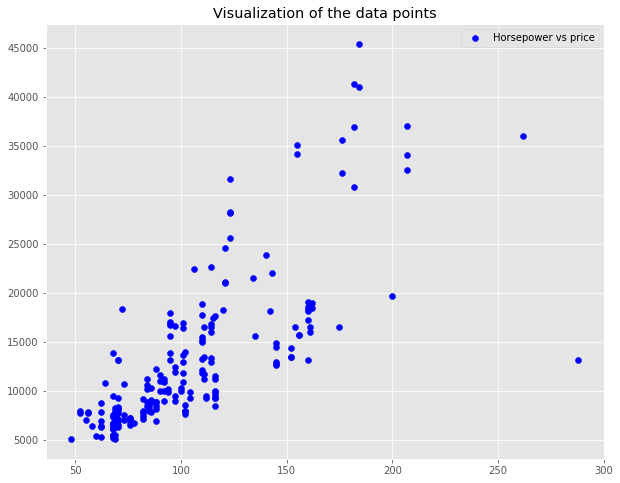

In [ ]:
plt.title("Visualization of the data points")
plt.scatter(data_new['horsepower'], data_new['price'], color="blue")
plt.legend(["Horsepower vs price"])
plt.show()


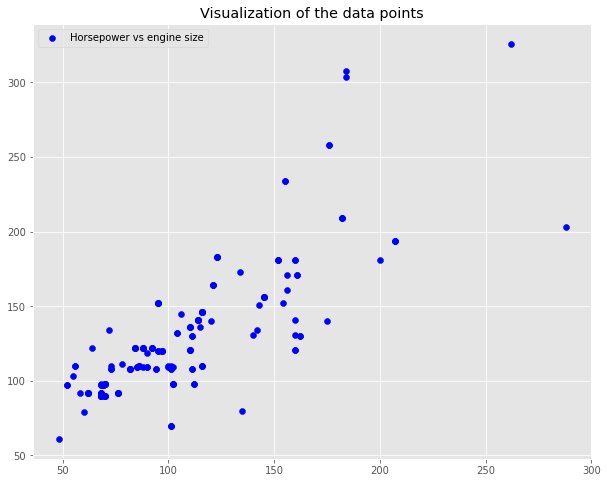

In [ ]:
plt.title("Visualization of the data points")
plt.scatter(data_new['horsepower'], data_new['engine-size'], color="blue")
plt.legend(["Horsepower vs engine size"])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model,metrics

In [ ]:
def lin_regression(x,y,z):

  # learning the coefficient and intercept

  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

  m1 = linear_model.LinearRegression()
  m1.fit(x_train,y_train)

  print(m1.intercept_)
  print(m1.coef_)
 # print("The coefficient is: {} and the intercept is: {}\n".format(m1.coef_[0][0],m1.intercept_[0]))

  y_pred = m1.predict(x_test)
  print("MSE:", metrics.mean_squared_error(y_pred,y_test))

  # plotting data and predictions
  print(z, "vs price")
  #plt.title("vs Visualization of actual data vs predicted outputs")
  plt.scatter(x,y,color="blue")
  plt.plot(x_test,y_pred,color="red")
  plt.legend(["predicted line","actual data points"])
 
  plt.show()
  
  print("The RMSE for linear regression is: {}".format(math.sqrt(metrics.mean_squared_error(y_pred,y_test))))

  # plot training line and test points

In [ ]:
cols = ['normalized-losses', 'wheel-base', 'length','width','height','curb-weight','engine-size', 
                 'bore','stroke','compression-ratio','horsepower','peak-rpm', 'city-mpg','highway-mpg']



9728.944472009778
[29.11017476]
MSE: 45885732.88044835
normalized-losses vs price


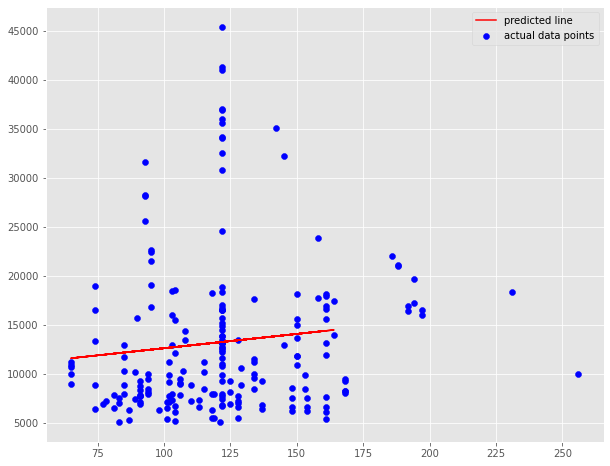

The RMSE for linear regression is: 6773.900861427509
-59513.039019893724
[738.84344061]
MSE: 40371554.754659876
wheel-base vs price


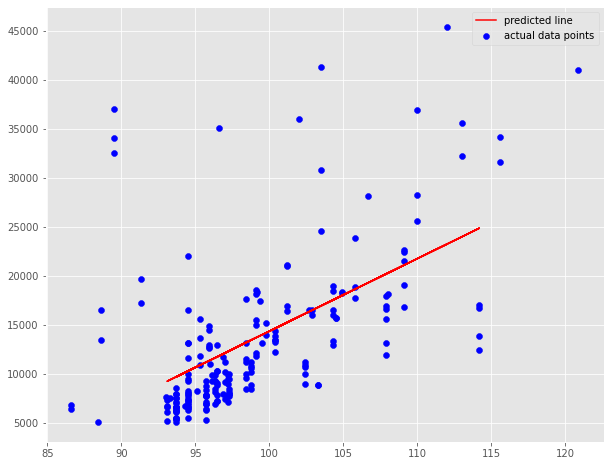

The RMSE for linear regression is: 6353.861405055974
-61916.22981514734
[434.0876018]
MSE: 13568300.898580685
length vs price


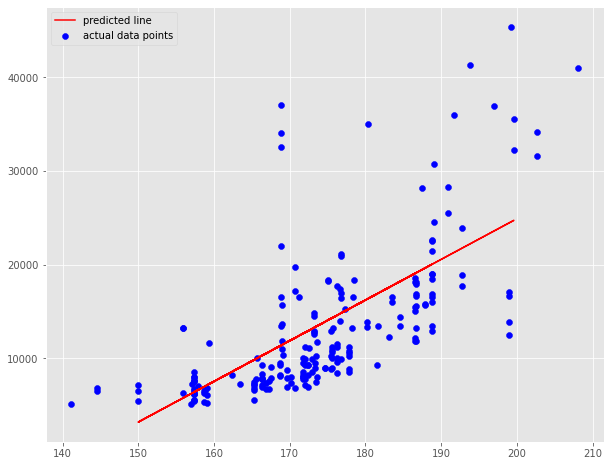

The RMSE for linear regression is: 3683.517462776671
-173524.88611331623
[2831.98758659]
MSE: 37424514.51814762
width vs price


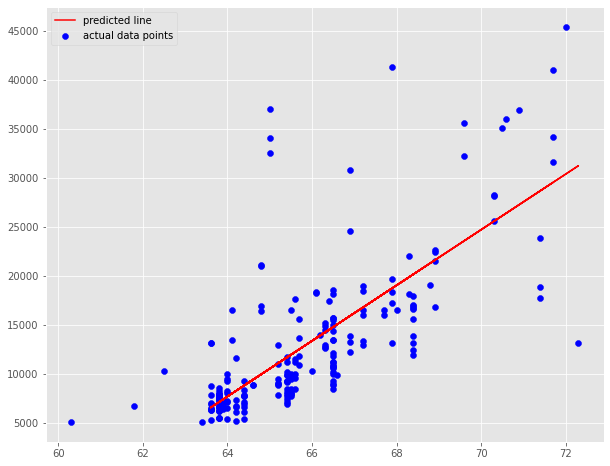

The RMSE for linear regression is: 6117.55788841819
-5033.098061252584
[343.15033282]
MSE: 53836773.39169276
height vs price


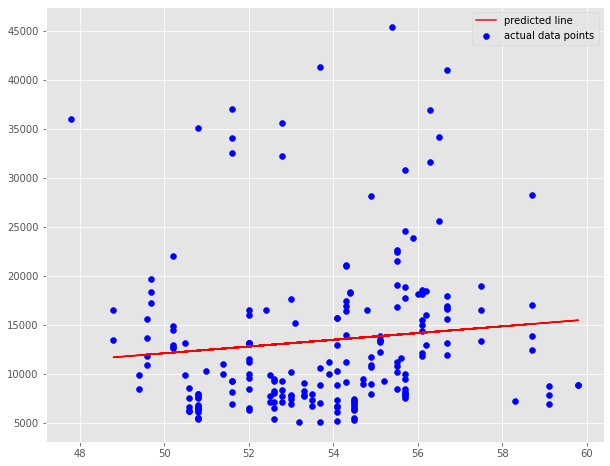

The RMSE for linear regression is: 7337.354658982538
-15181.958619315006
[10.93979594]
MSE: 48796673.261547655
curb-weight vs price


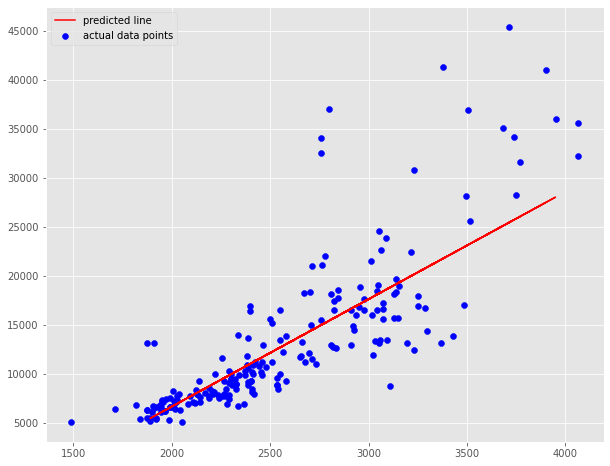

The RMSE for linear regression is: 6985.461563958938
-7452.022510219118
[163.25920014]
MSE: 9985598.65543721
engine-size vs price


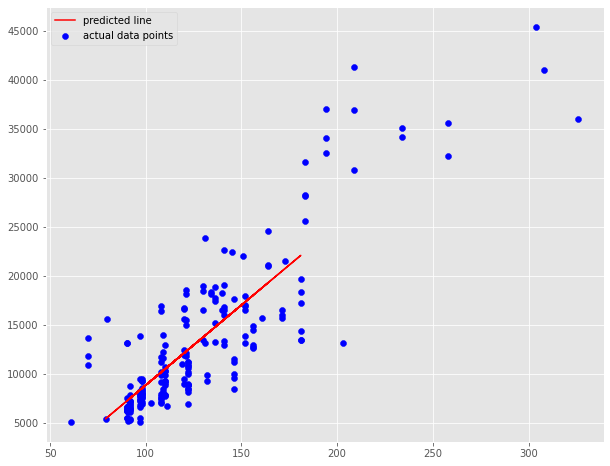

The RMSE for linear regression is: 3159.999787252716
-35982.677600716226
[14688.1680645]
MSE: 67062798.40732301
bore vs price


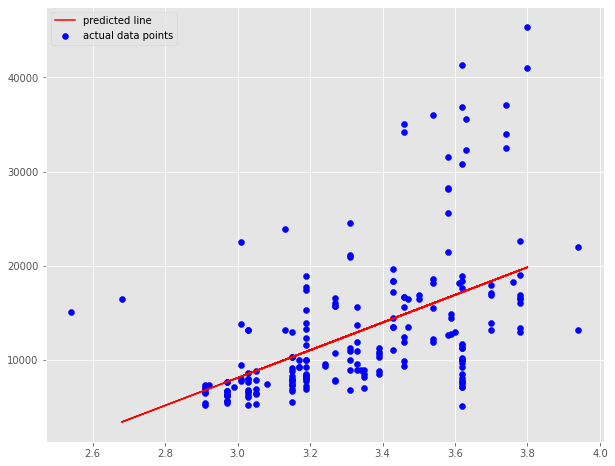

The RMSE for linear regression is: 8189.187896691772
8835.80129496557
[1439.10954117]
MSE: 29978527.682212602
stroke vs price


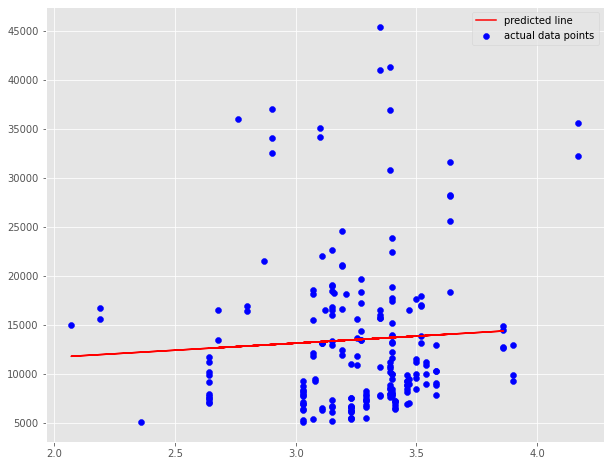

The RMSE for linear regression is: 5475.2650787165185
11134.092974346786
[177.23729055]
MSE: 82699325.9713349
compression-ratio vs price


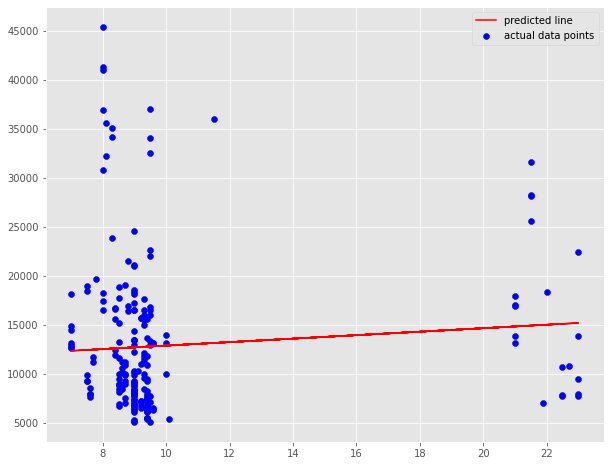

The RMSE for linear regression is: 9093.916976272376
-2860.812783713014
[151.31882897]
MSE: 26268683.627778392
horsepower vs price


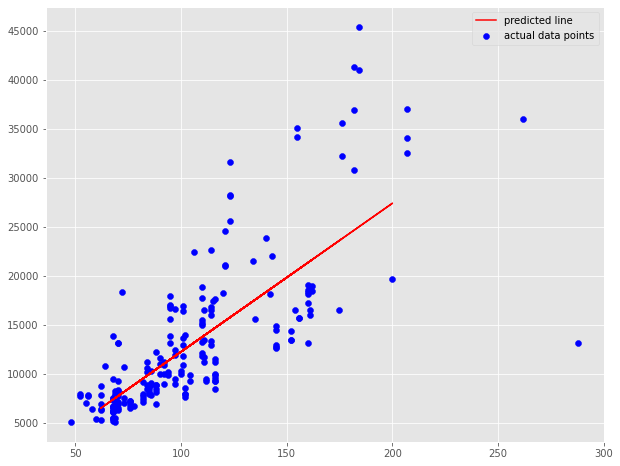

The RMSE for linear regression is: 5125.298394023356
25375.199486653066
[-2.32254965]
MSE: 45679894.12860758
peak-rpm vs price


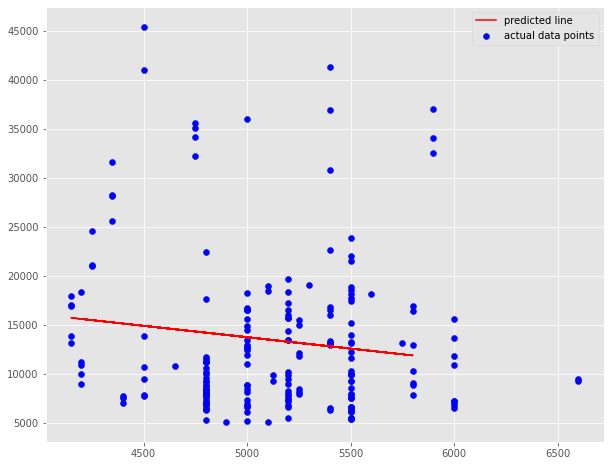

The RMSE for linear regression is: 6758.6902672490905
35146.99768935312
[-880.03051308]
MSE: 38769238.03480163
city-mpg vs price


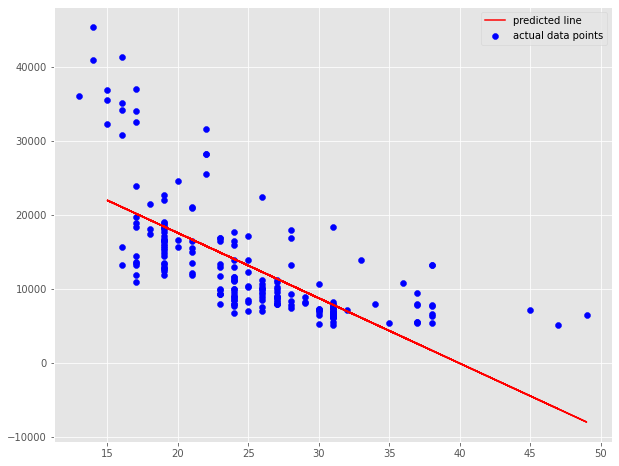

The RMSE for linear regression is: 6226.494843393161
38487.25237655929
[-824.68260991]
MSE: 27038546.56793265
highway-mpg vs price


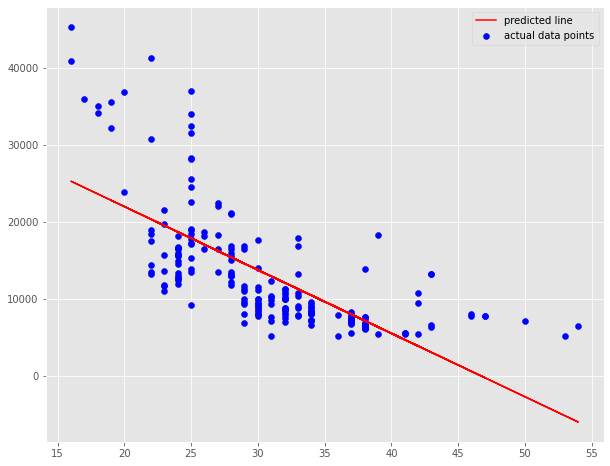

The RMSE for linear regression is: 5199.860245038577


In [ ]:
y = np.array(data_new['price'])
for i  in range(len(cols)):
  #print(data_new[cols])
  x = np.array(data_new[cols[i]]).reshape(-1,1)
  lin_regression(x,y,cols[i])
  x=0

In [ ]:
def lin_regression1(x,y):

  # learning the coefficient and intercept

  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

  m1 = linear_model.LinearRegression()
  m1.fit(x_train,y_train)

  #print(m1.intercept_)
  #print(m1.coef_)
 # print("The coefficient is: {} and the intercept is: {}\n".format(m1.coef_[0][0],m1.intercept_[0]))

  y_pred = m1.predict(x_test)
  print("MSE:", metrics.mean_squared_error(y_pred,y_test))

  plt.show()
  
  print("The RMSE for linear regression is: {}".format(math.sqrt(metrics.mean_squared_error(y_pred,y_test))))



In [ ]:
data_new.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


from the above scatter plot, it is well understood that:
'wheel-base', 'length','width','curb-weight','engine-size',
'bore','horsepower', 'city-mpg','highway-mpg' are the features
that determine the price of a vehicle. 

# Features Selected are 
# wheel-base, length,width,curb-weight,engine-size,
# bore,horsepower, city-mpg, and highway-mpg

In [ ]:
x=data_new.drop('price', axis=1)
y=data_new['price']

In [ ]:
print("Without Feature Selection:")
lin_regression1(x,y)

Without Feature Selection:
MSE: 15642463.283547442
The RMSE for linear regression is: 3955.0554084042165


In [ ]:

# features selected


data_fea_selected = data[['wheel-base', 'length','width','curb-weight','engine-size',
'bore','horsepower', 'city-mpg','highway-mpg','price']].copy()

In [ ]:
data_fea_selected.shape

(205, 10)

In [ ]:
x1=data_fea_selected.drop('price', axis=1)
y1=data_fea_selected['price']

In [ ]:
print("With Selected features:")
lin_regression1(x1,y1)

With Selected features:
MSE: 12628131.85849145
The RMSE for linear regression is: 3553.608287148634


MSE is high when all the features were selected 
On applying linear regression on the above selected features the MSE has reduced to  12628131.85849145 from 15642463.283547442

Similarly the RMSE is 3553.608287148634 with feature seletion and
3955.0554084042165 without feature selection

Both RMSE and MSE have showed significant reduction when building the model using the both positive and negative correlated features.


# Comparing between MAE and MSE between two datasets
# Without selection of features = x and y
# With selection of feature = x1 and y1 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, shuffle = False)

In [ ]:
lin_model = LinearRegression(fit_intercept = False)
lin_model.fit(X_train, y_train)
test_lin_pred = lin_model.predict(X_test)


In [ ]:
print("without Apply Feature Selection: ")
print('MAE:', mean_absolute_error(test_lin_pred, y_test))
print('MSE:',mean_squared_error(test_lin_pred, y_test))



without Apply Feature Selection: 
MAE: 2416.3678658732174
MSE: 8697813.81036941


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.15, shuffle = False)

In [ ]:
lin_model = LinearRegression(fit_intercept = False)
lin_model.fit(X_train, y_train)
test_lin_pred = lin_model.predict(X_test)


In [ ]:
print("Model using Feature Selection: ")
print('MAE:', mean_absolute_error(test_lin_pred, y_test))
print('MSE:',mean_squared_error(test_lin_pred, y_test))



Model using Feature Selection: 
MAE: 2218.316206494977
MSE: 8905359.741646845


From the above Couple of cells - We can see marginal decrease in MAE and MSE with feature selection as compared to without feature seletion.


# RMSE between with and without feature selection...................

In [ ]:
# POLYNOMIAL REGRESSION

def poly_regression(x,y,deg):

  poly = PolynomialFeatures(degree=deg)

  x_ = poly.fit_transform(x)
  poly.fit(x_,y)

  m1 = linear_model.LinearRegression()
  m1.fit(x_,y)
  y_pred = m1.predict(x_)

  rmse = np.sqrt(metrics.mean_squared_error(y_pred,y))

  print("Model using Feature Selection: ")
  print('MAE:', mean_absolute_error(test_lin_pred, y_test))
  print('MSE:',mean_squared_error(test_lin_pred, y_test))

  print("The RMSE for polynomial regression with degree", deg, " is: {}".format(rmse))

In [ ]:
# POLYNOMIAL REGRESSION

def poly_regression(x,y,deg):

  poly = PolynomialFeatures(degree=deg)

  x_ = poly.fit_transform(x)
  poly.fit(x_,y)

  m1 = linear_model.LinearRegression()
  m1.fit(x_,y)
  y_pred = m1.predict(x_)

  rmse = np.sqrt(metrics.mean_squared_error(y_pred,y))

  print("The RMSE for polynomial regression with degree", deg, " is: {}".format(rmse))

In [ ]:
def lin_regression2(x,y):

  # learning the coefficient and intercept

  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

  m1 = linear_model.LinearRegression()
  m1.fit(x_train,y_train)

  y_pred = m1.predict(x_test)
  metrics.mean_squared_error(y_pred,y_test)

  # plotting data and predictions

  print("The RMSE for linear regression is: {}".format(math.sqrt(metrics.mean_squared_error(y_pred,y_test))))

  # plot training line and test points

In [ ]:
print("RMSE without feature selection")
lin_regression2(x,y)
poly_regression(x,y,3)

RMSE without feature selection
The RMSE for linear regression is: 4395.480808425055
The RMSE for polynomial regression with degree 3  is: 234.32125222861828


In [ ]:
print("RMSE with feature selection")
lin_regression2(x1,y1)
poly_regression(x1,y1,3)

RMSE with feature selection
The RMSE for linear regression is: 4133.593291953182
The RMSE for polynomial regression with degree 3  is: 447.7398573710846


**Below cells are comparsion between train and test accuracy based on feature selection and without feature selection **

In [ ]:
lin_model = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, shuffle = False)
lin_model.fit(x_train, y_train)

y_train_predict = lin_model.predict(x_train)
rmse = (np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
r2 = metrics.r2_score(y_train, y_train_predict)
print("Without Feature selection")
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}\n'.format(rmse))

y_test_predict = lin_model.predict(x_test)
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))
r2 = metrics.r2_score(y_test, y_test_predict)

print("Model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

Without Feature selection
The model performance for training set
--------------------------------------
RMSE is 3510.6835117095807

Model performance for testing set
--------------------------------------
RMSE is 2956.0051541789317


In [ ]:
lin_model = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.15, shuffle = False)
lin_model.fit(x_train, y_train)

y_train_predict = lin_model.predict(x_train)
rmse = (np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
r2 = metrics.r2_score(y_train, y_train_predict)
print("Model performance after selection of features")
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}\n'.format(rmse))

y_test_predict = lin_model.predict(x_test)
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))
r2 = metrics.r2_score(y_test, y_test_predict)

print("Model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

Model performance after selection of features
The model performance for training set
--------------------------------------
RMSE is 3819.2408947032427

Model performance for testing set
--------------------------------------
RMSE is 2910.079321071275


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, shuffle = False)

In [ ]:
tol      = [1e-4, 1e-3, 1e-2]
alpha_1  = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2  = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol,
                 'alpha_1': alpha_1,
                 'alpha_2' : alpha_2,
                 'lambda_1': lambda_1,
                 'lambda_2' : lambda_2 }

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian,
                                     bayesian_grid,
                                     scoring='neg_mean_squared_error',
                                     cv=3,
                                     return_train_score=True,
                                     n_jobs=-1,
                                     n_iter=40,
                                     verbose=1)

bayesian_search.fit(x_train, y_train)
y_train_predict = bayesian_search.predict(x_train)
print(bayesian_search.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'tol': 0.0001, 'lambda_2': 0.0001, 'lambda_1': 0.0001, 'alpha_2': 1e-07, 'alpha_1': 1e-07}


In [ ]:
rmse = (np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
r2 = metrics.r2_score(y_train, y_train_predict)
print("Model performance before feature selection using Ridge Regression")
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}\n'.format(rmse))

y_test_predict = bayesian_search.predict(x_test)
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))
r2 = metrics.r2_score(y_test, y_test_predict)

print("Model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

Model performance before feature selection using Ridge Regression
The model performance for training set
--------------------------------------
RMSE is 3802.178438792878

Model performance for testing set
--------------------------------------
RMSE is 2742.5000147896926


In [ ]:

x=data_fea_selected.drop('price', axis=1)
y=data_fea_selected['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, shuffle = False)

In [ ]:
rmse = (np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
r2 = metrics.r2_score(y_train, y_train_predict)
print("Model performance after feature selection using Ridge Regression")
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}\n'.format(rmse))

y_test_predict = bayesian_search.predict(x_test)
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))
r2 = metrics.r2_score(y_test, y_test_predict)

print("Model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

Model performance after feature selection using Ridge Regression
The model performance for training set
--------------------------------------
RMSE is 3888.5711226232866

Model performance for testing set
--------------------------------------
RMSE is 2731.599508647172


Polynomial Ridge Regression

In [ ]:
bayesian_search_poly = RandomizedSearchCV(bayesian,
                                     bayesian_grid,
                                     scoring='neg_mean_squared_error',
                                     cv=3,
                                     return_train_score=True,
                                     n_jobs=-1,
                                     n_iter=40,
                                     verbose=1)


In [ ]:
bayesian_search_poly.fit(x_train, y_train);
print(bayesian_search_poly.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'tol': 0.0001, 'lambda_2': 1e-05, 'lambda_1': 0.0001, 'alpha_2': 1e-06, 'alpha_1': 1e-06}


In [ ]:
bayesian_poly_confirmed = bayesian_search_poly.best_estimator_
y_test_pred = bayesian_poly_confirmed.predict(x_test)
y_train_pred = bayesian_search_poly.predict(x_train)

In [ ]:
rmse = (np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
r2 = metrics.r2_score(y_train, y_train_predict)
print("Model performance after feature selection using poly Ridge Regression")
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}\n'.format(rmse))

y_test_predict = bayesian_poly_confirmed.predict(x_test)
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))
r2 = metrics.r2_score(y_test, y_test_predict)

print("Model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

Model performance after feature selection using poly Ridge Regression
The model performance for training set
--------------------------------------
RMSE is 3888.5711227927313

Model performance for testing set
--------------------------------------
RMSE is 2731.59950874948


Observation
From the above results, ridge and polynomial ridge regression has low RMSE values than the logistic regression and polynomial regression


**The below are the visualization of feature we have selected to compare between three errors: MSE MAE and RMSE between with and without feature selection - It had been well significant that errors were reduced when the models are developed after appropriate selection of features, which can reduce the computation cost and increase the precision of the machine learning models**

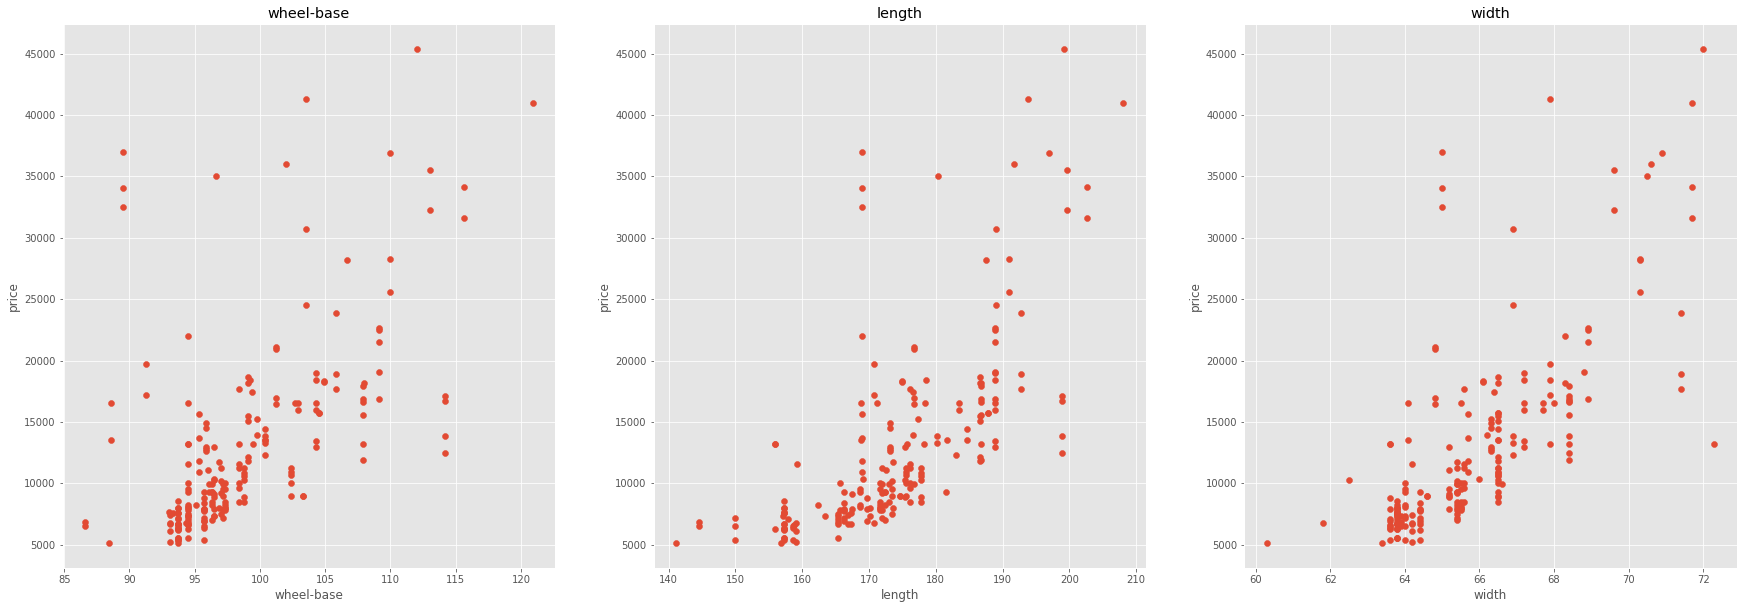

In [ ]:
plt.figure(figsize=(30, 10))

features = ['wheel-base', 'length','width']
target = data_fea_selected['price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    house_features = data_fea_selected[col]
    target_price = target
    plt.scatter(house_features, target_price, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('price')

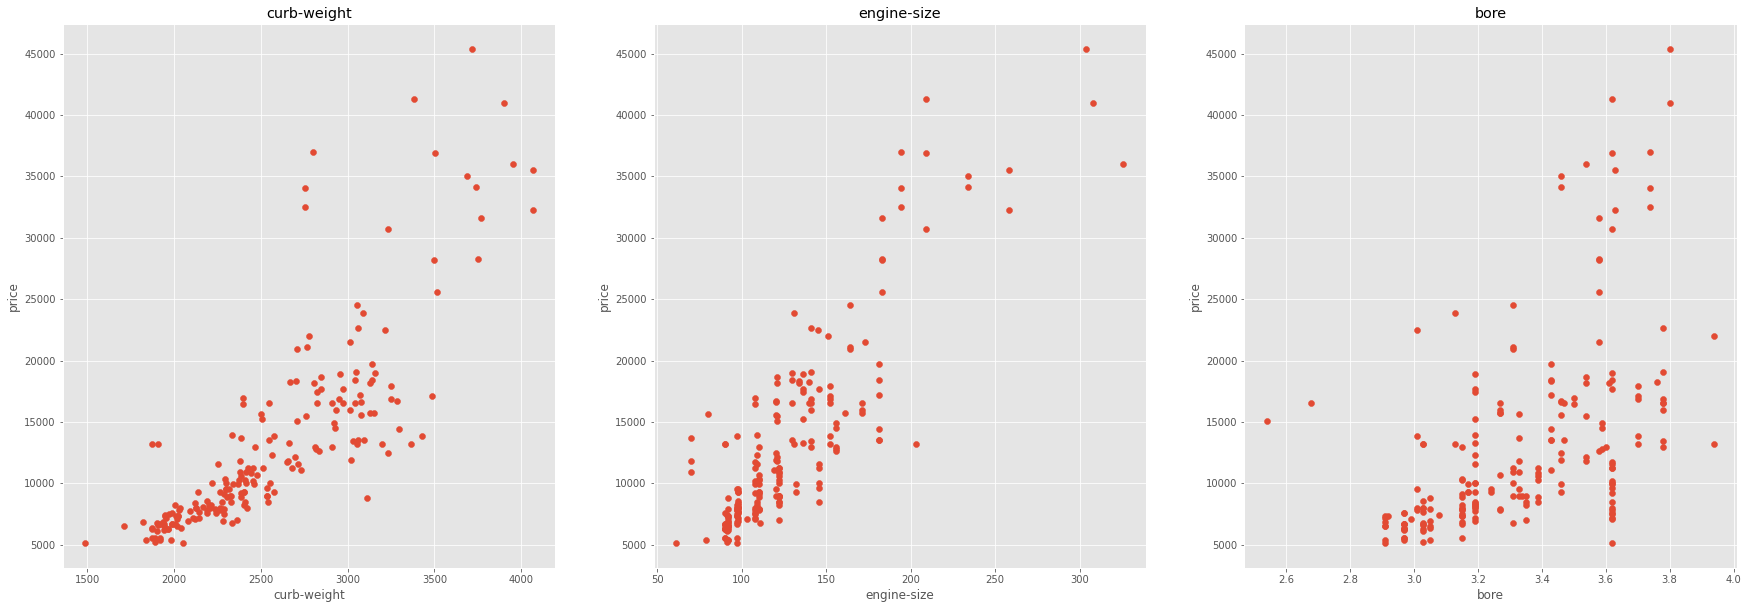

In [ ]:
plt.figure(figsize=(30, 10))

features = ['curb-weight','engine-size','bore']
target = data_fea_selected['price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    house_features = data_fea_selected[col]
    target_price = target
    plt.scatter(house_features, target_price, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('price')

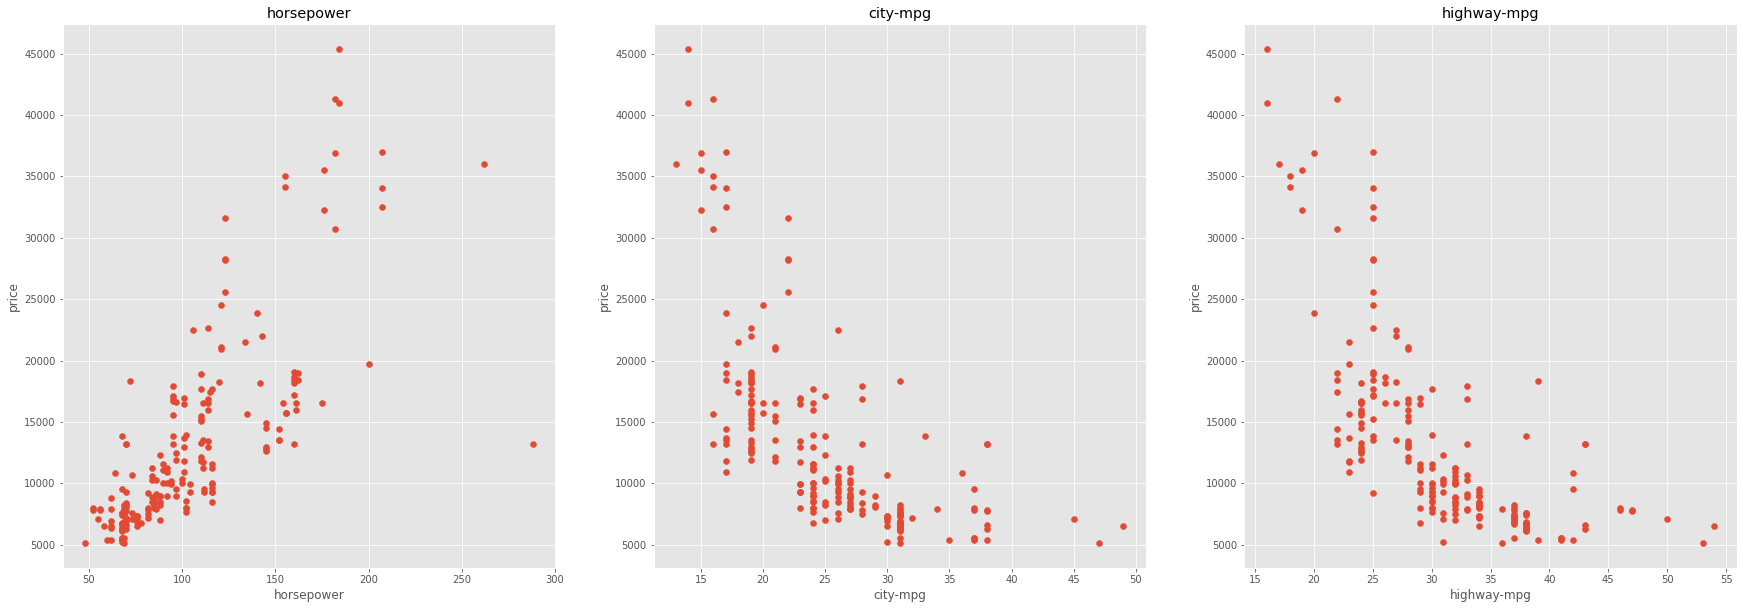

In [ ]:
plt.figure(figsize=(30, 10))

features = ['horsepower', 'city-mpg','highway-mpg']
target = data_fea_selected['price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    house_features = data_fea_selected[col]
    target_price = target
    plt.scatter(house_features, target_price, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('price')